In [2]:
%load_ext vimception

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [1]:
%matplotlib inline
%config IPCompleter.greedy=True
import pylab
pylab.rcParams['figure.figsize'] = [10.0, 8.0]

In [2]:
import astroid, sys, os, logging
import numpy as np
logging.getLogger().setLevel(logging.DEBUG)

In [122]:
import code_reader; code_reader = reload(code_reader)
import heimdall; heimdall = reload(heimdall)
import data_flow; data_flow = reload(data_flow)
import watcher; watcher = reload(watcher)
import optimizer; optimizer = reload(optimizer)
import modcode; modcode = reload(modcode)
from tests import code7; code7 = reload(code7)
from tests import subscripts_1; subscripts_1 = reload(subscripts_1)
astroid.MANAGER.clear_cache()

In [119]:
heim = heimdall.Heimdall(max_nesting=2, prof_shot_time=4)
%pdb off
heim.run('subscripts_1.g(7)', globals(), locals())

Automatic pdb calling has been turned OFF
g iter 0 Took 2.712622 seconds, sum is 2536396218.669003

INFO:heimdall:Null row: ('profile', 0, 'profiler')
DEBUG:heimdall:Found node root: PStatRow( '','profile',0,'subscripts_1.g(7)', 1 )



Going to watch for ('/home/richard/workspace/heimdall/tests/subscripts_1.py', 'f1')
g iter 1 Took 2.649714 seconds, sum is 2536396218.669003
g iter 2 Took 2.696098 seconds, sum is 2536396218.669003
g iter 3 Took 2.743161 seconds, sum is 2536396218.669003
In optimize_chain_inner!  Looking to optimize these dot calls/shapes  {NeededInfo: ('/home/richard/workspace/heimdall/tests/subscripts_1.py', 20, 4, '[s.shape,t.shape]', <ExtCallNode: subscripts_1.py 20(Call np.dot())@4>): [(1400, 2500), (2500, 2900)]}
chain_for called with subscripts_1.py 20(Call np.dot())@4
dot_shapes is {<ExtCallNode: subscripts_1.py 20(Call np.dot())@4>: [(1400, 2500), (2500, 2900)]}
arg source for  subscripts_1.py 20(Name(s))@4 is subscripts_1.py 20(Name(s))@4
arg source for  subscripts_1.py 20(Name(t))@4 is subscripts_1.py 17(Call rng.uniform())@2
chain_for returning [(<ExprNode: subscripts_1.py 20(Name(s))@4>, (1400, 2500)), (<ExtCallNode: subscripts_1.py 17(Call rng.uniform())@2>, (2500, 2900))]
And here are t

In [103]:
last_stmt_sequence

[('/home/richard/workspace/heimdall/tests/code7.py', 14, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 15, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 16, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 17, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 19, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 20, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 21, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 23, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 23, 'return')]

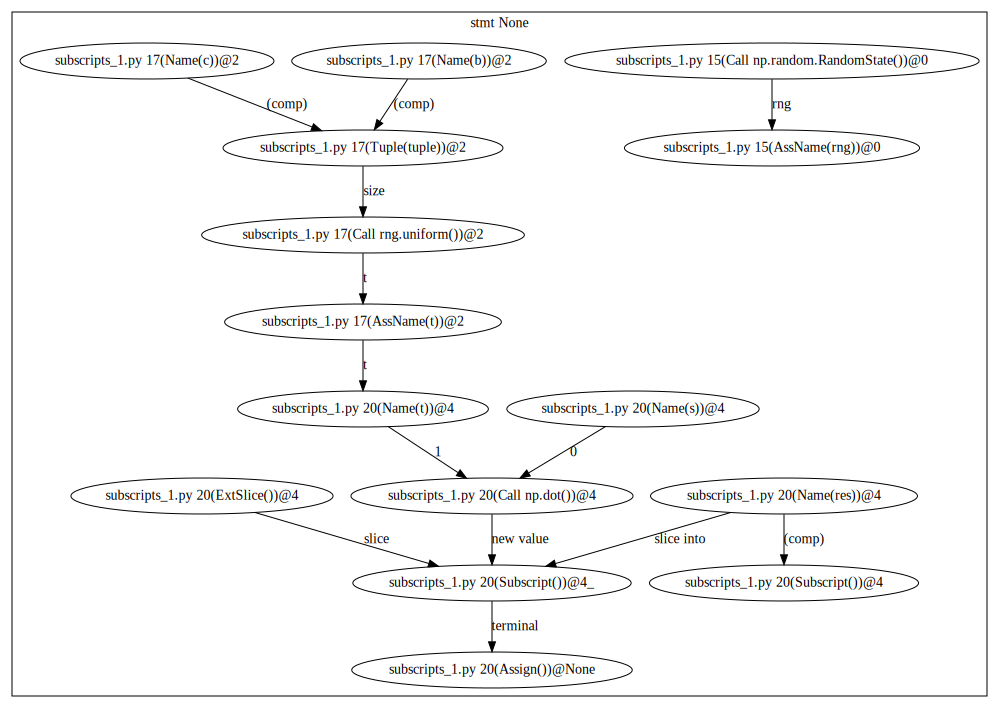

In [120]:
heim.dfg.draw_digraph(size="15")

In [ ]:
%debug data_flow.analyze_flow(last_stmt_sequence, heim.watcher.loopstats)

NOTE: Enter 'c' at the ipdb>  prompt to continue execution.
> <string>(1)<module>()

ipdb> b data_flow:514
Breakpoint 1 at /home/richard/workspace/heimdall/data_flow.py:514
ipdb> cont
> /home/richard/workspace/heimdall/data_flow.py(514)add_composition_edge()
    513         self.nodes.add(n2)
1-> 514         e = self.CompositionEdge(n1, n2, "(comp)")
    515         self.edges.add(e)

ipdb> print n1
subscripts_1.py 17(Name(c))@2
ipdb> cont
> /home/richard/workspace/heimdall/data_flow.py(514)add_composition_edge()
    513         self.nodes.add(n2)
1-> 514         e = self.CompositionEdge(n1, n2, "(comp)")
    515         self.edges.add(e)

ipdb> print n1
subscripts_1.py 17(Name(b))@2
ipdb> print n2
subscripts_1.py 17(Tuple(tuple))@2
ipdb> cont
> /home/richard/workspace/heimdall/data_flow.py(514)add_composition_edge()
    513         self.nodes.add(n2)
1-> 514         e = self.CompositionEdge(n1, n2, "(comp)")
    515         self.edges.add(e)

ipdb> print n1, n2
subscripts_1.py 20(Name

In [71]:
last_stmt_sequence

[('/home/richard/workspace/heimdall/tests/code7.py', 14, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 15, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 16, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 17, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 19, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 20, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 21, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 20, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 19, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 23, 'line'),
 ('/home/richard/workspace/heimdall/tests/code7.py', 23, 'return')]

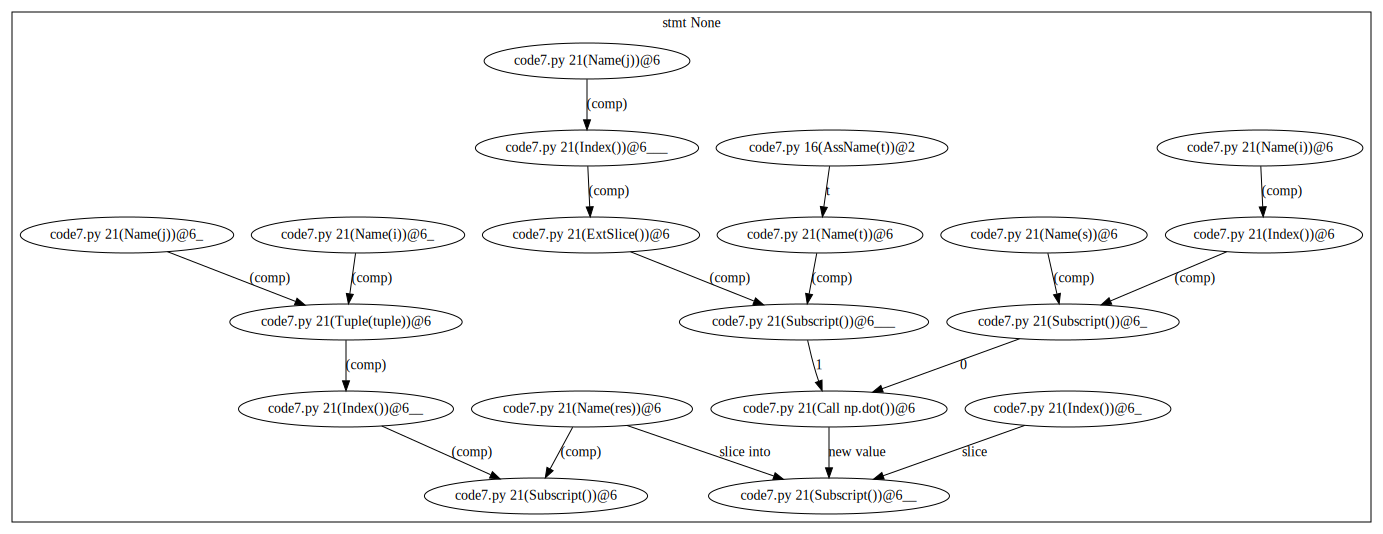

In [113]:
list(list(heim.dfg.nodes)[8].dfg.nodes)[-1].dfg.draw_digraph()